# **PROCESSING INCOME**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import stat 
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import RobustScaler

## **1. Data Collection**

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  

In [3]:
X.shape

(48842, 14)

In [4]:
y.shape

(48842, 1)

In [5]:
# meger data with columns
raw_data = pd.concat([X,y], axis= 1) 

In [6]:
raw_data.shape

(48842, 15)

In [7]:
raw_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**the mean value of features**
| `Thuộc tính`         | Mô tả                                                                 |
|--------------------|----------------------------------------------------------------------|
| `age`                | Tuổi của cá nhân.                                                     |
| `workclass`         | Loại hình việc làm (ví dụ: Tư nhân, Chính phủ, Tự kinh doanh, v.v.). |
| `fnlwgt`             | Trọng số cuối cùng của khảo sát.                                     |
| `education`          | Trình độ học vấn.                                                     |
| `education-num`      | Số năm học (dưới dạng số nguyên).                                     |
| `marital-status`     | Tình trạng hôn nhân (độc thân, đã kết hôn, đã ly hôn, v.v.).          |
| `occupation`         | Nghề nghiệp (Quản lý, Hành chính, Dịch vụ, v.v.).                     |
| `relationship`       | Quan hệ với chủ hộ (vợ/chồng, con cái, người thân khác, v.v.).        |
| `race`               | Chủng tộc.                                                            |
| `sex`                | Giới tính.                                                            |
| `capital-gain`       | Thu nhập từ vốn (không phải từ lương).                               |
| `capital-loss`       | Khoản lỗ từ vốn (từ đầu tư).                                          |
| `hours-per-week`     | Số giờ làm việc mỗi tuần.                                             |
| `native-country`     | Quốc gia xuất xứ.                                                     |
"""

In [8]:
raw_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
raw_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

## **2. Data Cleaning**

### **2.1 Check duplicated records**

In [10]:
num_dup_rows = raw_data.duplicated(keep="first").sum()
num_dup_rows

np.int64(29)

In [11]:
raw_data = raw_data.drop_duplicates(keep="first")

In [12]:
raw_data.duplicated(keep="first").sum()

np.int64(0)

### **2.2 Missing value**

**how is the dataset distributed ?**

In [13]:
# missing ratio
def missing_ratio(series):
    return series.isnull().mean() * 100


def lower_quantile(series):
    return series.quantile(0.25)

def median(series):
    return series.median()


def upper_quantile(series):
    return series.quantile(0.75)

# the following function will specifically present the number distribution 
def number_dis(data):
    col = data.select_dtypes(include=['float','int'])
    return col.agg([missing_ratio,"min",lower_quantile,median,upper_quantile,"max"])
number_dis(raw_data)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
lower_quantile,28.0,117555.0,9.0,0.0,0.0,40.0
median,37.0,178140.0,10.0,0.0,0.0,40.0
upper_quantile,48.0,237620.0,12.0,0.0,0.0,45.0
max,90.0,1490400.0,16.0,99999.0,4356.0,99.0


- there are no the missing value in number columns

In [14]:
def num_values(series):
    return series.nunique()

def value_ratios(series):
 
    # compute percent of the series without checking for missing values 
    value_counts = series.value_counts(normalize=True) * 100
    
    # convert to dictionary type and need to round the percentage
    value_ratios = value_counts.round(1).to_dict()
    
    # sort the dictionary value in ascending
    sorted_value_ratios = dict(sorted(value_ratios.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_value_ratios

# the distribution in object features 
def object_dis(data):
    col = data.select_dtypes(include="object") 
    return col.agg([missing_ratio, num_values, value_ratios])

object_features_dic = object_dis(raw_data)

In [15]:
object_features_dic

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
missing_ratio,1.972835,0.0,0.0,1.978981,0.0,0.0,0.0,0.561326,0.0
num_values,9,16,7,15,6,5,2,42,4
value_ratios,"{'Private': 70.8, 'Self-emp-not-inc': 8.1, 'Lo...","{'HS-grad': 32.3, 'Some-college': 22.3, 'Bache...","{'Married-civ-spouse': 45.8, 'Never-married': ...","{'Prof-specialty': 12.9, 'Craft-repair': 12.8,...","{'Husband': 40.4, 'Not-in-family': 25.7, 'Own-...","{'White': 85.5, 'Black': 9.6, 'Asian-Pac-Islan...","{'Male': 66.8, 'Female': 33.2}","{'United-States': 90.3, 'Mexico': 2.0, '?': 1....","{'<=50K': 50.6, '<=50K.': 25.5, '>50K': 16.1, ..."


**Show the feature to check value**

In [16]:
object_features_dic.loc["value_ratios", "workclass"]

{'Private': 70.8,
 'Self-emp-not-inc': 8.1,
 'Local-gov': 6.6,
 'State-gov': 4.1,
 '?': 3.8,
 'Self-emp-inc': 3.5,
 'Federal-gov': 3.0,
 'Without-pay': 0.0,
 'Never-worked': 0.0}

I observed that there is '?' in each object attribute.
Hence, I will replace this with Nan 


In [17]:
raw_data = raw_data.replace("?", np.nan)

In [18]:
object_features_dic = object_dis(raw_data)
object_features_dic

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
missing_ratio,5.734128,0.0,0.0,5.754615,0.0,0.0,0.0,1.753631,0.0
num_values,8,16,7,14,6,5,2,41,4
value_ratios,"{'Private': 73.6, 'Self-emp-not-inc': 8.4, 'Lo...","{'HS-grad': 32.3, 'Some-college': 22.3, 'Bache...","{'Married-civ-spouse': 45.8, 'Never-married': ...","{'Prof-specialty': 13.4, 'Craft-repair': 13.3,...","{'Husband': 40.4, 'Not-in-family': 25.7, 'Own-...","{'White': 85.5, 'Black': 9.6, 'Asian-Pac-Islan...","{'Male': 66.8, 'Female': 33.2}","{'United-States': 91.4, 'Mexico': 2.0, 'Philip...","{'<=50K': 50.6, '<=50K.': 25.5, '>50K': 16.1, ..."


**Các bản ghi bị ảnh hưởng có nên được loại trừ khỏi tập dữ liệu không? Và nên thay thế bằng giá trị gì?**
- Analyze: 
    - there are missing values in these including: `workclass`: 5.734128 , `occupation`: 5.754615	, `native-country`: 1.753631
    - However, these values is quite small.
- Conclude: 
    - Handle it instead of removing these columns.  
    - these attribute come in object or catergorical. Therefore, I will replace them with components which appear the most  

In [19]:
missing_columns = ["workclass","occupation", "native-country"]

In [20]:
# functions which will replace by max fequency 
def replace_by_max_fequency(data, object_features_dic, features:list):
   
    for feature in features: 
        
        # lấy giá trị có tần số suất hiện cao nhất bằng cách lấy vị trị (location) của value_ratios trong hàm object_dis ở trên
        # vị trí số 0 là lớn nhất vì em đã sắp xếp các giá trị này rồi ạ.
       replace_value = list(object_features_dic.loc['value_ratios',feature])[0] 
       
       # handle Nan
       data[feature] = data[feature].replace(np.nan,replace_value )
       
    return data

raw_data = replace_by_max_fequency(raw_data,object_features_dic, missing_columns)

In [21]:
object_dis(raw_data)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,8,16,7,14,6,5,2,41,4
value_ratios,"{'Private': 75.1, 'Self-emp-not-inc': 7.9, 'Lo...","{'HS-grad': 32.3, 'Some-college': 22.3, 'Bache...","{'Married-civ-spouse': 45.8, 'Never-married': ...","{'Prof-specialty': 18.4, 'Craft-repair': 12.5,...","{'Husband': 40.4, 'Not-in-family': 25.7, 'Own-...","{'White': 85.5, 'Black': 9.6, 'Asian-Pac-Islan...","{'Male': 66.8, 'Female': 33.2}","{'United-States': 91.5, 'Mexico': 1.9, 'Philip...","{'<=50K': 50.6, '<=50K.': 25.5, '>50K': 16.1, ..."


Tôi nhận thấy rằng có sự lỗi trong cột Income

In [22]:
raw_data.income.unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

Sử dụng regex để thay thế lỗi này

In [23]:
raw_data["income"] = raw_data["income"].replace(r'\.$','',regex=True)

In [24]:
raw_data.income.unique()

array(['<=50K', '>50K'], dtype=object)

### **2.3 Check Type For each feature**

In [25]:
raw_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

### **2.4 Outlier Detection**

**Using Boxplot to for detecting outliers**

In [26]:
num_feature = raw_data.select_dtypes(include = ["int", "float"])

In [27]:
len(num_feature.columns)

6

In [28]:
num_feature.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

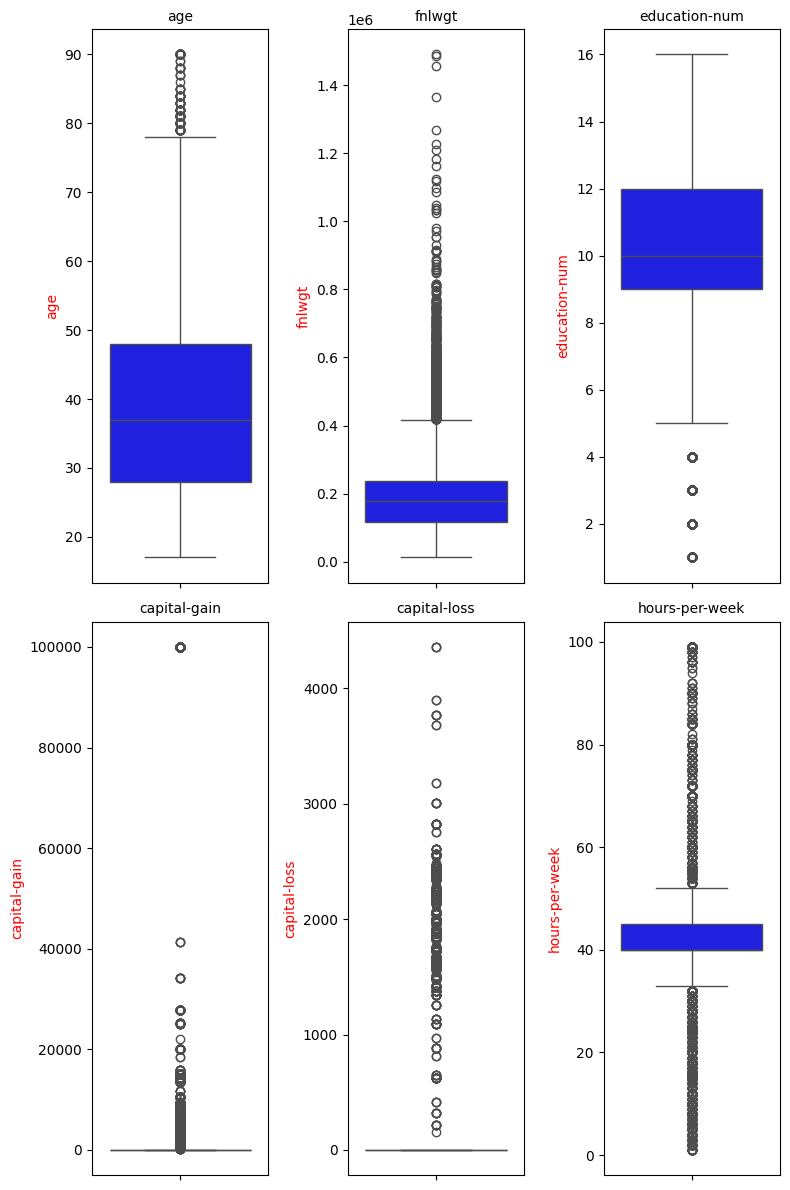

In [29]:
def create_boxplot(columns):
    
    # (2,3)
    n_rows, n_cols = 2,3
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (8,12))
    
    for index, col in enumerate(columns):
        r = index // n_cols
        c = index % n_cols
        ax =axes[r,c]
        sns.boxplot(y = columns[col],ax = ax, color= "blue")
        
        ax.set_title(f'{col}', fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel(col, color = "red")
    plt.tight_layout()
    plt.show() 
    
create_boxplot(num_feature)

from histogram plot above, we observe that many abnormal issue happened in `capital-gain` and `capital-loss`

In [30]:
# understand better about these 
number_dis(raw_data)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
lower_quantile,28.0,117555.0,9.0,0.0,0.0,40.0
median,37.0,178140.0,10.0,0.0,0.0,40.0
upper_quantile,48.0,237620.0,12.0,0.0,0.0,45.0
max,90.0,1490400.0,16.0,99999.0,4356.0,99.0


**Analyze:**
- Most values such as min, lower_quantile, median, upper_quantile are equal to 0. Meanwhile, max is 99999.0 with capital-gain and 4356.0 with capital-loss.
- These prove that both are almost meaningless.

To sum up, I will eliminate both. 

In [31]:
raw_data = raw_data.drop(["capital-gain", "capital-loss"], axis= 1)

In [32]:
raw_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

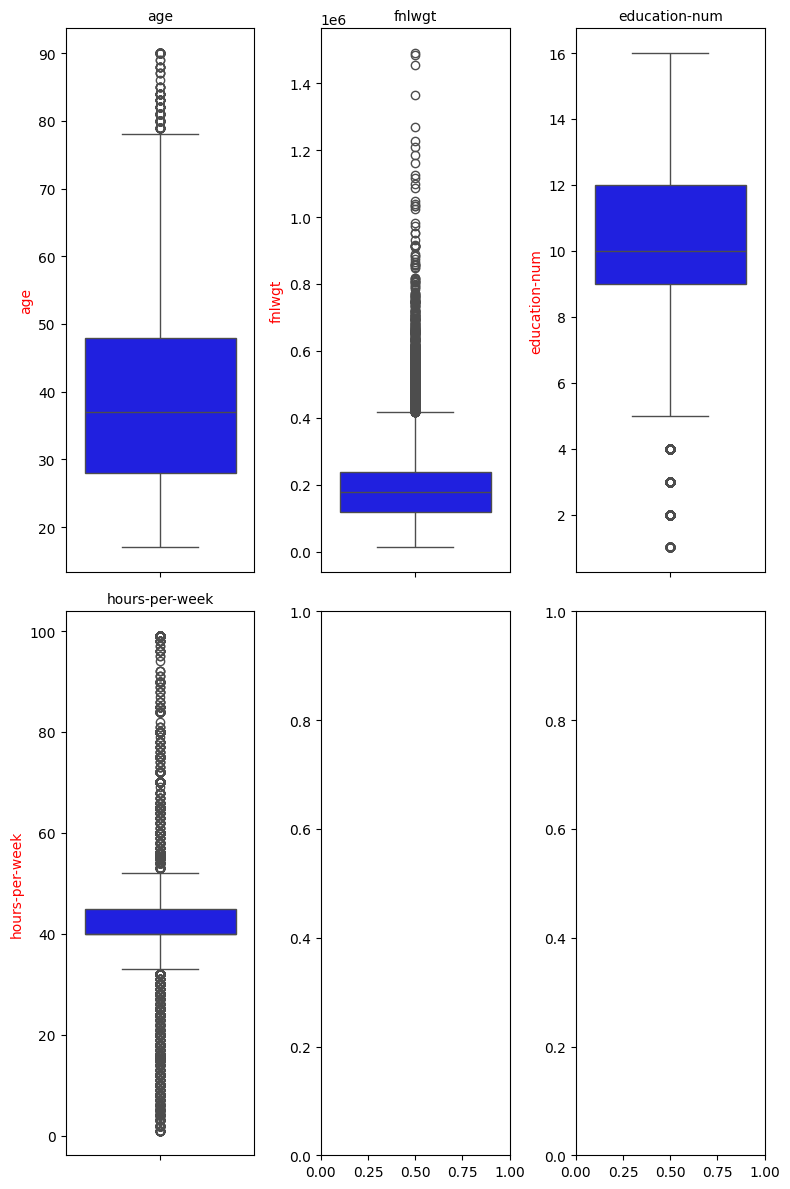

In [33]:
num_feature = raw_data.select_dtypes(include = ["int", "float"])
create_boxplot(num_feature)

**The Dataset contains lots of ouliers**

In [34]:
def remove_outliers_iqr(data, cols):
    # create a replication of dataset 
    data_cleaned = data.copy()

    for col in cols:
        # compute Q1 and Q3 for each columns
        Q1 = data_cleaned[col].quantile(0.25)
        Q3 = data_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        # compute outlier threshold
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # eliminate values which get out of threshold
        data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]

    return data_cleaned

num_columns = raw_data.select_dtypes(include = ["int","float"]).columns
raw_data = remove_outliers_iqr(raw_data,num_columns)


In [35]:
raw_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


## **3. Data Preprocessing**

### **3.1 Normalization**

**I choose **Robust Scaler** to normalization problem, because The Dataset contains lots of outliers.**  
Similar to Z-score normalization, which uses the mean and standard deviation, Robust Scaler instead utilizes the median and the interquartile range (IQR) to scale features, making it less sensitive to outliers.

In [36]:
nol_feature = ["fnlwgt"]
normal = RobustScaler()
raw_data[nol_feature] = normal.fit_transform(raw_data[nol_feature])


In [37]:
raw_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,-0.880691,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
2,38,Private,0.350346,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,0.520345,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,1.444429,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,0.964715,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


### **3.2 Features Selection**

**How to select Features efficiently?** My solution is: 
- On one hand, If columns come in float or integer type, I will use **Correlation Coefficient** method.
    - This likes Lasso in Regularization, If two features are strongly correlated, I will eliminate one of them. 
    - Because the model only needs one, as the second does not add additional information.
- On other hand, If If column type is object, I will take **Chi-square** method.
    - It is used to evaluate the independence between categorical variables and target variables. whether or not to elimenate them. 

#### **3.2.1 Quantitative Features**

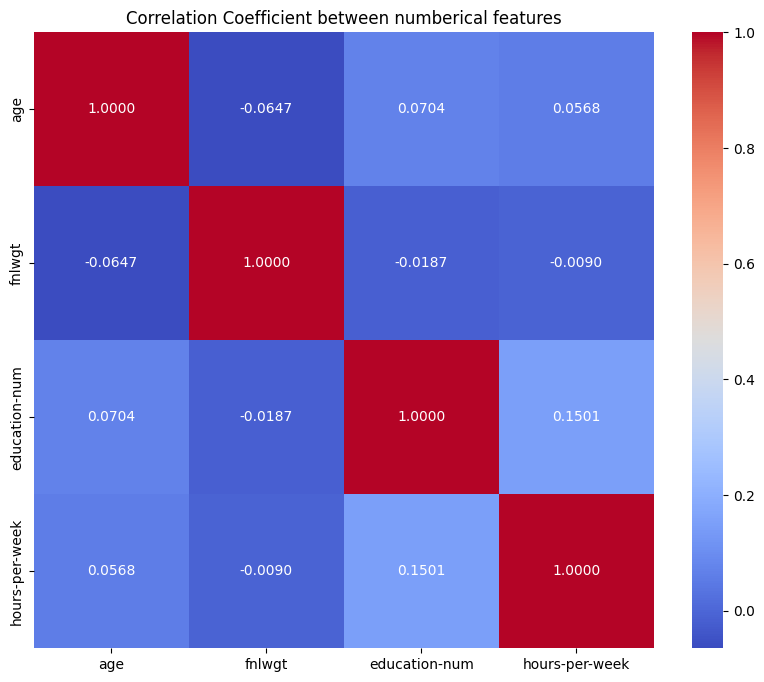

In [38]:
num_cols = raw_data.select_dtypes(include = ["int","float"])

cor = num_cols.corr() # compute corr matrix

plt.figure(figsize=(10, 8))  

# draw the heatmap with purpose to show Corr matrix. 
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".4f", cbar=True)
# set title name
plt.title("Correlation Coefficient between numberical features")
# show plot 
plt.show()

Analyze: 
- Most of features are weakly correlated each other, So I don't eliminate any feature.

#### **3.2.2 Quantitative Features**

In [40]:
def chi_square_manual(feature, target):
    # Build contingency table (cross-tabulation)
    contingency = pd.crosstab(feature, target)
    observed = contingency.values

    # Calculate row totals, column totals and grand total
    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    total = observed.sum()

    # Calculate expected frequencies
    expected = []
    for i in range(len(row_totals)):
        expected_row = []
        for j in range(len(col_totals)):
            exp_ij = row_totals[i] * col_totals[j] / total
            expected_row.append(exp_ij)
        expected.append(expected_row)

    # Calculate Chi-Square statistic
    chi_square = 0
    for i in range(len(observed)):
        for j in range(len(observed[0])):
            o = observed[i][j]
            e = expected[i][j]
            chi_square += (o - e) ** 2 / e

    # Degrees of freedom = (number of rows - 1) * (number of columns - 1)
    dof = (len(row_totals) - 1) * (len(col_totals) - 1)

    # Basic critical value threshold approximation for p ≈ 0.05
    # get it from Chi-Square Distribution Table
    threshold = {1: 3.84, 2: 5.99, 3: 7.81, 4: 9.49, 5: 11.07}
    keep = chi_square > threshold.get(dof, 9.49)

    return chi_square, dof, keep

def chi_square_feature_selection(data, target_column):
    # Get all categorical columns except the target
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    categorical_cols = [col for col in categorical_cols if col != target_column]

    for col in categorical_cols:
        chi_val, dof, keep = chi_square_manual(data[col], data[target_column])
        print(f"{col:<25} | Chi-Square: {chi_val:.2f} | DOF: {dof:<2} | {'KEEP' if keep else 'DROP'}")

# Example usage
chi_square_feature_selection(raw_data, 'income')


workclass                 | Chi-Square: 737.06 | DOF: 7  | KEEP
education                 | Chi-Square: 3913.02 | DOF: 11 | KEEP
marital-status            | Chi-Square: 6899.81 | DOF: 6  | KEEP
occupation                | Chi-Square: 2906.34 | DOF: 13 | KEEP
relationship              | Chi-Square: 7048.77 | DOF: 5  | KEEP
race                      | Chi-Square: 385.74 | DOF: 4  | KEEP
sex                       | Chi-Square: 1529.07 | DOF: 1  | KEEP
native-country            | Chi-Square: 240.89 | DOF: 40 | KEEP


**As a result, I will not elimnate any component in those columns** 

### **3.3. Data Discretization**


In [45]:
discrete_cols = ['age', 'education-num', 'hours-per-week']

In [49]:
def equal_width_binning_with_edges(data, columns, num_bins=5):
    # Loop through each column to apply binning
    for col in columns:
        # Get the minimum and maximum values of the column to determine the range
        min_val = data[col].min()
        max_val = data[col].max()

        # Calculate the width of each bin
        bin_width = (max_val - min_val) / num_bins

        # Generate bin edges based on bin width
        bins = [min_val + i * bin_width for i in range(num_bins + 1)]

        # Create a new column with the bin edge values assigned directly to the values
        data[f'{col}_ew_bin'] = pd.cut(data[col], bins=bins, labels=bins[:-1], include_lowest=True)

    # Return the updated DataFrame with bin edge values
    return data

# Apply equal-width binning on 'age', 'education-num', and 'hours-per-week'
data_bin_equal_width = equal_width_binning_with_edges(raw_data.copy(), discrete_cols, num_bins=6)

In [50]:
def equal_depth_binning(data, columns, num_bins=5):
    # Loop through each column to apply binning
    for col in columns:
        # Get the minimum and maximum values of the column to determine the range
        min_val = data[col].min()
        max_val = data[col].max()

        # Use pandas qcut to create bins with equal depth (frequency)
        data[f'{col}_ed_bin'], bin_edges = pd.qcut(data[col], q=num_bins, retbins=True, labels=False, duplicates='drop')

        # Create the bins and assign the bin edges as values
        data[f'{col}_ed_bin'] = data[f'{col}_ed_bin'].apply(lambda x: bin_edges[x])

    # Return the updated DataFrame with bin edge values
    return data

# Apply equal-depth binning on 'age', 'education-num', and 'hours-per-week'
data_bin_equal_depth = equal_depth_binning(raw_data.copy(), discrete_cols, num_bins=5)


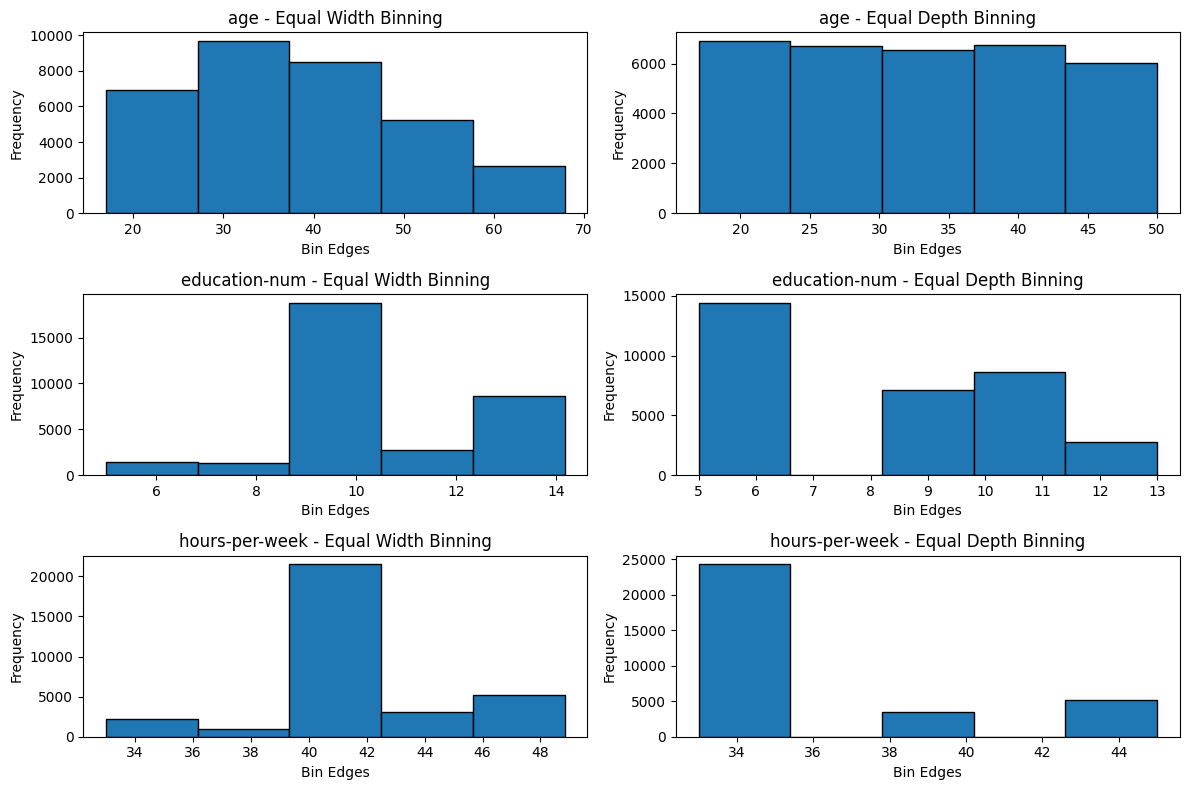

In [51]:
def plot_histograms(data_ew, data_ed, columns):
    
    # Plot histograms for Equal-Width Binning and Equal-Depth Binning
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 8))

    for i, col in enumerate(columns):
        # Plot Equal-Width Binned data
        axes[i, 0].hist(data_ew[col + '_ew_bin'], bins=5, edgecolor='black')
        axes[i, 0].set_title(f'{col} - Equal Width Binning')
        axes[i, 0].set_xlabel('Bin Edges')
        axes[i, 0].set_ylabel('Frequency')

        # Plot Equal-Depth Binned data
        axes[i, 1].hist(data_ed[col + '_ed_bin'], bins=5, edgecolor='black')
        axes[i, 1].set_title(f'{col} - Equal Depth Binning')
        axes[i, 1].set_xlabel('Bin Edges')
        axes[i, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot histograms
plot_histograms(data_bin_equal_width, data_bin_equal_depth, discrete_cols)
